In [1]:
#Run only once
%load_ext autoreload
%autoreload 2

In [2]:
import logging
import math

import slidingwindow as sw

import cv2
import numpy as np
import tensorflow as tf
import time

from tensorflow.python.compiler.tensorrt import trt_convert as trt
import matplotlib.pyplot as plt

In [29]:
graph_path = 'tf-pose-estimation/models/graph/cmu/graph_opt.pb'

In [9]:
protoFile = "pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "pose/mpi/pose_iter_160000.caffemodel"
# Read the network into Memory
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

In [10]:
pwd

'/home/DeepLearningMachine/JointAngleMeasurement/openpose/models'

In [183]:
# Read image

frame = cv2.imread("/home/DeepLearningMachine/JointAngleMeasurement/data/Poses/test/squatting/squat_017.jpg")
	
# Specify the input image dimensions
inWidth = 224
inHeight = 224
	 
# Prepare the frame to be fed to the network
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)
	 
# Set the prepared object as the input blob of the network
net.setInput(inpBlob)

In [184]:
output = net.forward()

In [185]:
len(points)

15

In [186]:
points[0]

(264, 24)

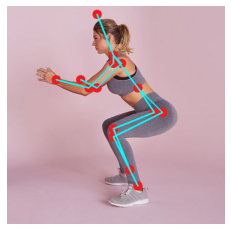

In [187]:
H = output.shape[2]
W = output.shape[3]
# Empty list to store the detected keypoints
points = []
for i in range(15):
# confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
# Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
# Scale the point to fit on the original image
    x = (inWidth * point[0])/H*3
    y = (inHeight * point[1])/W*3
    if prob:
        cv2.circle(frame, (int(x), int(y)), 13, (25, 22, 250), thickness=-1, lineType=cv2.FILLED)
        # cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 255), 3, lineType=cv2.LINE_AA)
# Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
	    points.append(None)

#Head(0) to Neck(1)
cv2.line(frame, points[0], points[1], (255, 255, 0), 3)

#Neck(1) to Chest(14)
cv2.line(frame, points[1], points[14], (255, 255, 0), 3)

#Chest(14) to R(8) and L Hip(11)
cv2.line(frame, points[14], points[8], (255, 255, 0), 3)
cv2.line(frame, points[14], points[11], (255, 255, 0), 3)

#Right Hip(8) to Right Knee(9)
cv2.line(frame, points[8], points[9], (255, 255, 0), 3)
#Right Knee(9) to Right Ankle(10)
cv2.line(frame, points[9], points[10], (255, 255, 0), 3)

#Left Hip(11) to Left Knee(12)
cv2.line(frame, points[11], points[12], (255, 255, 0), 3)
#Left Knee(12) to Left Ankle(13)
cv2.line(frame, points[12], points[13], (255, 255, 0), 3)

#Neck(1) to Right Shoulder(2)
cv2.line(frame, points[1], points[2], (255, 255, 0), 3)
#Right Shoulder(2) to Right Elbow(3)
cv2.line(frame, points[2], points[3], (255, 255, 0), 3)
#Right Elbow(3) to Right Wrist(4)
cv2.line(frame, points[3], points[4], (255, 255, 0), 3)

#Neck(1) to Left Shoulder(5)
cv2.line(frame, points[1], points[5], (255, 255, 0), 3)
#Left Shoulder(5) to Left Elbow(6)
cv2.line(frame, points[5], points[6], (255, 255, 0), 3)
#Left Elbow(6) to Left Wrist(7)
cv2.line(frame, points[6], points[7], (255, 255, 0), 3)


plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()